Hoje é: 13/07/2022
* 2019
2/2019 7/2019
2019-02-01
2019-07-01


/var/folders/ms/gdwy6wc55tg4cf1qz04p2jnr0000gn/T/ipykernel_29475/869126581.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinasc.head().dropna(inplace=True)


2019-07-01


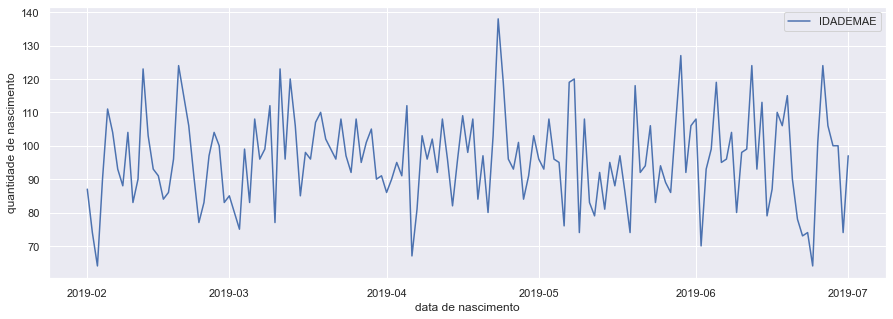

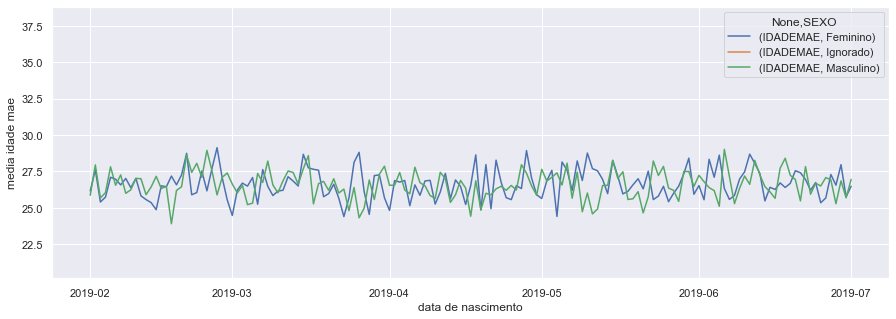

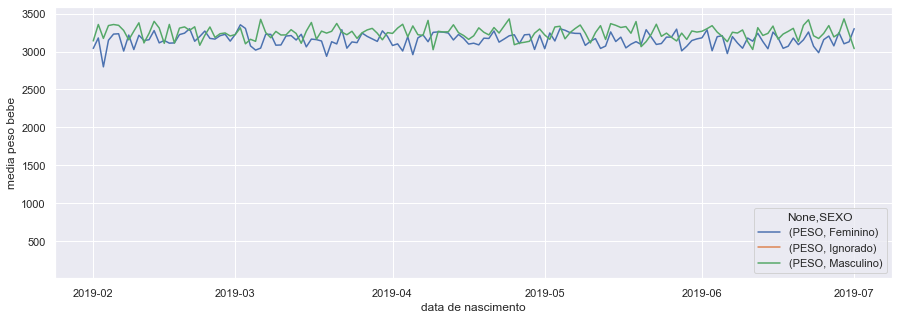

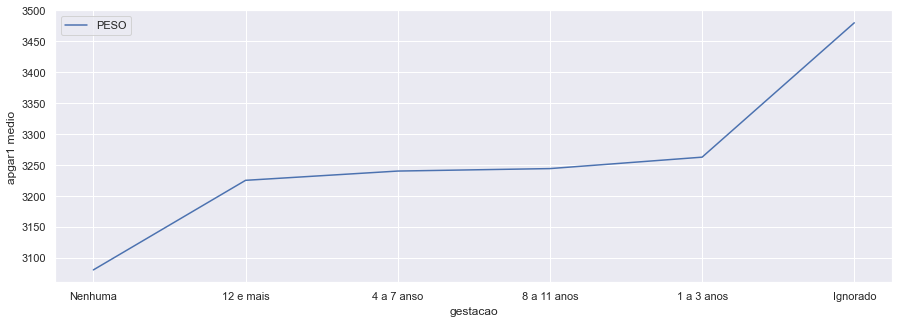

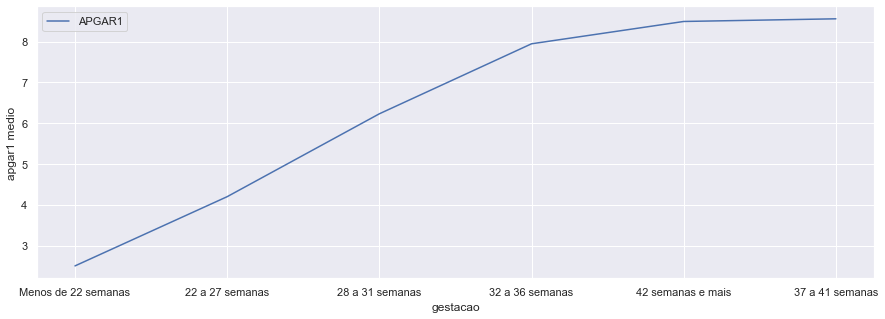

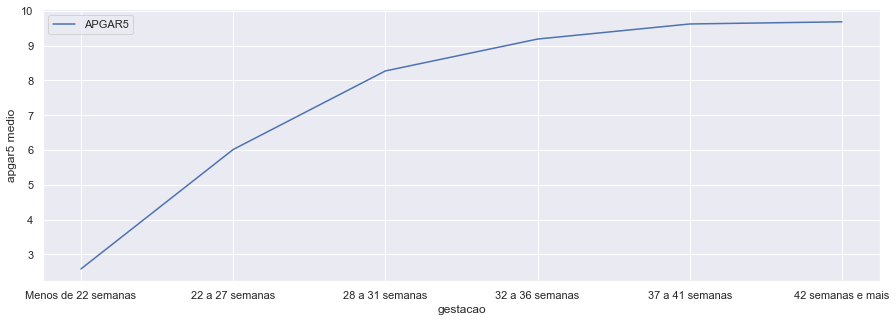

In [292]:
from pysus.online_data.sinasc import download
import pandas as pd
from datetime import date
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


sns.set_theme()  
ano = 0
today = date.today()
d1 = today.strftime("%d/%m/%Y")
print("Hoje é:", d1)

ano = int(input("Qual ano base deseja utilizar?, Ex: 2019"))
if (ano <= 2020) and (ano >= 1994):
    print(f"*",ano)
elif (ano >= 2021) or (ano < 1994):
    print(f"*",ano)
    print("Ano ainda não consta no banco de dados")
    
d1a = input("Gostaria de utilizar o filtro de mês?: \n 1) Yes. 2) No. [Y/N]? : ")
if (d1a == "y") or (d1a == "Y") :
    data_filter1 = input("Escreva o mês inicio, Ex: 2 : ") + '/' + str(ano)
    data_filter2 = input("Escreva o mês final, Ex: 8 : ") + '/' + str(ano) 
    print(data_filter1, data_filter2)


filtro1 = datetime.strptime(data_filter1, '%m/%Y').date() 
print(filtro1)
filtro2 = datetime.strptime(data_filter2, '%m/%Y').date() 
print(filtro2)
sinasc = download('SE', ano)
sinasc.head().dropna(inplace=True)
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'], format='%d%m%Y').dt.date
max_data = sinasc.DTNASC.max()
max_data
sinasc=sinasc.replace('',np.nan)
sinasc['PESO'] = sinasc['PESO'].dropna().astype(int)
sinasc['IDADEMAE'] = sinasc['IDADEMAE'].astype(int)
sinasc = sinasc.astype({'APGAR1':'float','APGAR5':'float'})
ESCMAEmap = {1: 'Nenhuma', 2: '1 a 3 anos', 3:'4 a 7 anso',4:'8 a 11 anos',5:'12 e mais',9:'Ignorado'}
gestacaomap = {1: 'Menos de 22 semanas', 2: '22 a 27 semanas', 3:'28 a 31 semanas',4:'32 a 36 semanas',5:'37 a 41 semanas',6:'42 semanas e mais',9:'Ignorado'}
sinasc['GESTACAO'] = sinasc['GESTACAO'].astype(float)
sinasc['GESTACAO'] = sinasc['GESTACAO'].map(gestacaomap)
sinasc['ESCMAE'] = sinasc['ESCMAE'].astype(float)
sinasc['ESCMAE'] = sinasc['ESCMAE'].map(ESCMAEmap)
sexomap = {0:'Ignorado',1: 'Masculino', 2: 'Feminino'}
sinasc['SEXO'] = sinasc['SEXO'].astype(int).map(sexomap)
filter_sinasc = sinasc.loc[(sinasc['DTNASC'] >= filtro1)
                           & (sinasc['DTNASC'] <= filtro2)]
max_data_filter = filter_sinasc.DTNASC.max()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None
if (d1a == 'y') or (d1a == 'Y'):
    maxd = str(max_data_filter)
    sinascf = filter_sinasc.copy(deep=True)
else:
    maxd = str(max_data)
    sinascf = sinasc.copy(deep=True)

print(maxd)
os.makedirs('./output/figs/'+maxd, exist_ok=True)


plota_pivot_table(sinascf, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
plt.savefig('./output/figs/'+maxd+'/quantidade de nascimento.png')

plota_pivot_table(sinascf, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('./output/figs/'+maxd+'/media idade mae por sexo.png')

plota_pivot_table(sinascf, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('./output/figs/'+maxd+'/media peso bebe por sexo.png')

plota_pivot_table(sinascf, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+maxd+'/media apgar1 por escolaridade mae.png')

plota_pivot_table(sinascf, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('./output/figs/'+maxd+'/media apgar1 por gestacao.png')

plota_pivot_table(sinascf, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('./output/figs/'+maxd+'/media apgar5 por gestacao.png')

Utulizei a bilioteca Pysus para fazer o download do banco de dados.